# **Pandas Basics**

### **Install pandas package**

%pip for execute all instead single

In [88]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### **Import pandas**

In [89]:
import pandas as pd


## **DataFrames**
A DataFrame is a two-dimensional labeled data structure with columns of potentially 
different data types, similar to a spreadsheet or SQL table. 
It provides a powerful and flexible way to manipulate and analyze structured data in Python, 
offering functionalities for data analysis.

In [90]:
# Empty DataFrame
df = pd.DataFrame()
df

""


In [91]:
# Create a DataFrame from a list of lists
row_data = [["Anam", 18], ["Jericho", 18], ["Justin", 18]]
column = ["Name", "Age"]
df = pd.DataFrame(row_data, columns=column)
df

,Name,Age
0,Anam,18
1,Jericho,18
2,Justin,18


In [92]:
# Create a dataframe using list of dictionaries
data = [{"Name": "Anam", "Age": 18}, 
 {"Name": "Jericho", "Age": 18}, 
 {"Name": "Justin", "Age": 18}]
df = pd.DataFrame(data)
df

,Name,Age
0,Anam,18
1,Jericho,18
2,Justin,18


In [93]:
# Create a dictionary of lists
data = {
   "Name": ["Anam", "Jericho", "Justin"], 
   "Age" : [18, 18, 18]
}
df = pd.DataFrame(data)
df

,Name,Age
0,Anam,18
1,Jericho,18
2,Justin,18


In [94]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## **Series**

A pandas Series is a one-dimensional labeled array capable of 
holding data of any type (integer, string, float, etc.). 
It's similar to a one-column table or an array with associated labels, 
providing powerful indexing and manipulation capabilities in Python.

In [95]:
series = pd.Series([1, 2, 3, 4, 5])
series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [96]:
print(type(series))

<class 'pandas.core.series.Series'>


### **Pandas Data Types**

Numeric:
- Integer (int64): Represents whole numbers (e.g., 10, -5). 
    This is the default integer type in pandas. (64 bit integer)
- Float (float64): Represents numbers with decimals (e.g., 3.14, -12.5).
- Boolean (bool): Represents logical True or False values.
- Object: This is a versatile but less efficient type that can store various data types 
like strings, lists, or custom objects. 
    Pandas uses this type when it cannot infer a more specific data type.

In [97]:
# Integer (int64)
int_series = pd.Series([1, 2, 3, 4, 5])
int_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [98]:
float_series = pd.Series([4.245, 76.563])
float_series

0     4.245
1    76.563
dtype: float64

In [99]:
# Boolean (bool): True = 1, False = 0
boolean_series = pd.Series([True, False, True, False])
boolean_series

0     True
1    False
2     True
3    False
dtype: bool

In [100]:
# Object (Mixed Data Types)
object_series = pd.Series([30, 3.14, True, False, "Anna"])
object_series

0       30
1     3.14
2     True
3    False
4     Anna
dtype: object

Specialized Data Types:
- Datetime (datetime64[ns]): Represents dates and times with nanosecond precision. 
    Useful for time-series data analysis.
- Timedelta (timedelta64[ns]): Represents durations between timestamps.
- Categorical: Represents categorical data with predefined categories. 
    Efficient for storing limited sets of categories.
- Sparse: Represents sparse data with many missing values. 
    Stores data efficiently by only keeping non-zero values.

In [101]:
# Datetime (datetime64[ns])
datetime_series = pd.Series([
        pd.to_datetime("2024-11-05 02:00:00"),
        pd.to_datetime("2024-11-05 05:00:00"),
        pd.to_datetime("2024-11-05 05:30:00"),
        pd.to_datetime("05-11-2024 05:30:00", format="%d-%m-%Y %H:%M:%S"),
        pd.to_datetime("05-2024-11 05:30:00", format="%d-%Y-%m %H:%M:%S"),
    ])
datetime_series

0   2024-11-05 02:00:00
1   2024-11-05 05:00:00
2   2024-11-05 05:30:00
3   2024-11-05 05:30:00
4   2024-11-05 05:30:00
dtype: datetime64[ns]

In [102]:
# Timedelta - duration between timestamps
timedelta_series = pd.Series([
    pd.Timedelta(days=8, hours=3, minutes=15),
    pd.Timedelta(days=4, hours=3, minutes=15),
    pd.Timedelta(days=1, hours=3, minutes=15)])
timedelta_series

0   8 days 03:15:00
1   4 days 03:15:00
2   1 days 03:15:00
dtype: timedelta64[ns]

In [103]:
# Categorical
categorial_series = pd.Series(
    pd.Categorical(["Marketing", "Marketing", "Sales", "Operations", "IT", "Finance", "HR"])
    ) # Double "Marketing" will be counted as single in Categories
categorial_series

0     Marketing
1     Marketing
2         Sales
3    Operations
4            IT
5       Finance
6            HR
dtype: category
Categories (6, object): ['Finance', 'HR', 'IT', 'Marketing', 'Operations', 'Sales']

In [104]:
# Sparse - missing/null values inside of a series (allowed)
sparse_series = pd.Series(
    pd.arrays.SparseArray([30, 31, 32, pd.NA, 29, 42, pd.NA])
)
sparse_series
# NaN - Not a Number

0     30
1     31
2     32
3    NaN
4     29
5     42
6    NaN
dtype: Sparse[object, nan]

### **Changing Data Types**

In [105]:
# the differences between df & print(df)
df

,Name,Age
0,Anam,18
1,Jericho,18
2,Justin,18


In [106]:
print(df)

      Name  Age
0     Anam   18
1  Jericho   18
2   Justin   18


In [107]:
# Step 1: Check the datatype
int_series.dtype

dtype('int64')

In [108]:
# Step 2: Change the DataType
# It will apply the new data type on a shallow copy of the variable.
# It doesn't affect the original variable.
# As type, change the ori to other type
float_series = int_series.astype('float64')
float_series.dtype

dtype('float64')

Q: Difference in property and method when calling property, it wont use parenthesis but on method instead

Properties
    Definition: Properties represent attributes or characteristics of an object.
    Usage: You access properties without parentheses.
    Example:
```
class Person:
    def __init__(self, name):
        self.name = name

person = Person("John")
print(person.name)  # Accessing the property 'name'
```
In this example, (name) is a property of the (Person) class.
Methods

    Definition: Methods are functions that belong to an object and can perform actions or computations.

    Usage: You call methods with parentheses.

    Example:
```
class Person:
    def __init__(self, name):
        self.name = name

    def greet(self):
        return f"Hello, my name is {self.name}"

person = Person("John")
print(person.greet())  # Calling the method 'greet()'
```
In this example, greet is a method of the Person class, and it uses parentheses when called.
Key Differences

    - Properties are accessed like attributes and do not use parentheses.
    - Methods are functions that perform actions and must be called with parentheses.

In [109]:
string_series = float_series.astype('string')
string_series

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: string

In [110]:
another_float_series = string_series.astype('float64')
another_float_series

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
dtype: float64

In [111]:
another_integer_series = another_float_series.astype('int64')
another_integer_series

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [112]:
# This will remove decimal points
float_series = pd.Series([3.14, -3.14])
integer_series = float_series.astype('int64')
integer_series

0    3
1   -3
dtype: int64

**Example: Sales Data Analysis**

You have a dataset of sales transactions that includes the product name, quantity sold, and sale price. 
You want to analyze the data to find the total revenue per product.

In [113]:
# Step 1 : DataFrame using Dictionary of List
data = {
    'Product Name':['Iced Tea', 'Hot Chocolate', 'Lemonade', 'Coffee', 'Milkshake', 'Tea', 'Smoothie', 'Soda', 'Protein Shake', 'Matcha Latte'],
    'Type': ['Cold', 'Hot', 'Cold', 'Hot', 'Cold', 'Hot', 'Cold', 'Hot', 'Cold', 'Hot'],
    'Stock': [15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
    'Quantity Sold':[6, 9, 13, 11, 8, 6, 14, 10, 8, 10],
    'Cost of Goods Sold':[7, 10, 6, 8, 9, 7, 10, 11, 8, 9],
    'Sale Price':[13, 20, 11, 15, 19, 14, 17, 18, 20, 12],
    'Rating': [1, 3, 5, 4, 3, 2, 5, 3, 3, 3]
}
sales_df = pd.DataFrame(data)
sales_df

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating
0,Iced Tea,Cold,15,6,7,13,1
1,Hot Chocolate,Hot,15,9,10,20,3
2,Lemonade,Cold,15,13,6,11,5
3,Coffee,Hot,15,11,8,15,4
4,Milkshake,Cold,15,8,9,19,3
5,Tea,Hot,15,6,7,14,2
6,Smoothie,Cold,15,14,10,17,5
7,Soda,Hot,15,10,11,18,3
8,Protein Shake,Cold,15,8,8,20,3
9,Matcha Latte,Hot,15,10,9,12,3


In [114]:
# Step 2: Access the columns (in Series)
sales_df["Quantity Sold"]

0     6
1     9
2    13
3    11
4     8
5     6
6    14
7    10
8     8
9    10
Name: Quantity Sold, dtype: int64

In [115]:
# Step 3: Calculate the Total Revenue
sales_df["Total Revenue"] = sales_df["Quantity Sold"] * sales_df["Sale Price"]
sales_df

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue
0,Iced Tea,Cold,15,6,7,13,1,78
1,Hot Chocolate,Hot,15,9,10,20,3,180
2,Lemonade,Cold,15,13,6,11,5,143
3,Coffee,Hot,15,11,8,15,4,165
4,Milkshake,Cold,15,8,9,19,3,152
5,Tea,Hot,15,6,7,14,2,84
6,Smoothie,Cold,15,14,10,17,5,238
7,Soda,Hot,15,10,11,18,3,180
8,Protein Shake,Cold,15,8,8,20,3,160
9,Matcha Latte,Hot,15,10,9,12,3,120


In [119]:
# (sale price - cost of goods) * quantity sold
# sales_df["Gross Profit"] = (sales_df["Sale Price"] - sales_df["Cost of Goods Sold"]) * sales_df["Quantity Sold"]
# sales_df

In [120]:
# Gross Profit: difference between total revenue and the cost of goods (cost per product multiplied to the quantity sold).
sales_df["Gross Profit"] = sales_df["Total Revenue"] - (sales_df["Quantity Sold"] * sales_df["Cost of Goods Sold"])
sales_df

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit
0,Iced Tea,Cold,15,6,7,13,1,78,36
1,Hot Chocolate,Hot,15,9,10,20,3,180,90
2,Lemonade,Cold,15,13,6,11,5,143,65
3,Coffee,Hot,15,11,8,15,4,165,77
4,Milkshake,Cold,15,8,9,19,3,152,80
5,Tea,Hot,15,6,7,14,2,84,42
6,Smoothie,Cold,15,14,10,17,5,238,98
7,Soda,Hot,15,10,11,18,3,180,70
8,Protein Shake,Cold,15,8,8,20,3,160,96
9,Matcha Latte,Hot,15,10,9,12,3,120,30


In [118]:
# sales_df["Gross Profit V3"] = sales_df['Total Revenue'] - (sales_df['Cost of Goods Sold'] * sales_df['Quantity Sold'])
# sales_df

Gross = Sales Price * Qty Sold
<br>
Costing = Cost of Goods * Qty Sold

Gross - Costing = Total Rev

### **Data Selection**

Pandas provides numerous methods for selecting and indexing data in Series and DataFrames, 
including label-based indexing with .loc, integer-position based indexing with .iloc, and conditional selection.

In [121]:
# [start:end(excluded):step]
sales_df["Product Name"][0:2]

0         Iced Tea
1    Hot Chocolate
Name: Product Name, dtype: object

### **Data Selection in Series**

In [122]:
# [start:end(excluded):step]
sales_df["Product Name"][::2]

0         Iced Tea
2         Lemonade
4        Milkshake
6         Smoothie
8    Protein Shake
Name: Product Name, dtype: object

In [123]:
# [start:end(excluded):step] -1 : reverse
sales_df["Product Name"][::-1]

9     Matcha Latte
8    Protein Shake
7             Soda
6         Smoothie
5              Tea
4        Milkshake
3           Coffee
2         Lemonade
1    Hot Chocolate
0         Iced Tea
Name: Product Name, dtype: object

### **Data Selection in DataFrame**

#### **Index Location (.iloc)**
- Will get rows based on a number/index.
- Will output into a DataFrame instead of a Series.
> Syntax: [starting_index:ending_index(excluded):step]

In [126]:
# [start:end(excluded):step]
# N: Get the first 3 rows/records inside the DataFrame
sales_df.iloc[0:3]


,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit
0,Iced Tea,Cold,15,6,7,13,1,78,36
1,Hot Chocolate,Hot,15,9,10,20,3,180,90
2,Lemonade,Cold,15,13,6,11,5,143,65


In [127]:
# [start:end(excluded):step]
# Get the first 5 rows/records and only the product name up until the sale price
sales_df.iloc[0:5, 0:6]

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price
0,Iced Tea,Cold,15,6,7,13
1,Hot Chocolate,Hot,15,9,10,20
2,Lemonade,Cold,15,13,6,11
3,Coffee,Hot,15,11,8,15
4,Milkshake,Cold,15,8,9,19


#### **Location (.loc)**
- Access a group of rows and columns by label(s) or a boolean array.
> Syntax: [starting_index:ending_index(included):step]

In [128]:
sales_df

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit
0,Iced Tea,Cold,15,6,7,13,1,78,36
1,Hot Chocolate,Hot,15,9,10,20,3,180,90
2,Lemonade,Cold,15,13,6,11,5,143,65
3,Coffee,Hot,15,11,8,15,4,165,77
4,Milkshake,Cold,15,8,9,19,3,152,80
5,Tea,Hot,15,6,7,14,2,84,42
6,Smoothie,Cold,15,14,10,17,5,238,98
7,Soda,Hot,15,10,11,18,3,180,70
8,Protein Shake,Cold,15,8,8,20,3,160,96
9,Matcha Latte,Hot,15,10,9,12,3,120,30


In [133]:
# [start:end(included):step]
sales_df.loc[1:5, "Product Name":"Sale Price"]

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price
1,Hot Chocolate,Hot,15,9,10,20
2,Lemonade,Cold,15,13,6,11
3,Coffee,Hot,15,11,8,15
4,Milkshake,Cold,15,8,9,19
5,Tea,Hot,15,6,7,14


In [135]:
# [start:end(included):step]
sales_df.loc[1:5, ["Product Name", "Quantity Sold", "Sale Price"]]

,Product Name,Quantity Sold,Sale Price
1,Hot Chocolate,9,20
2,Lemonade,13,11
3,Coffee,11,15
4,Milkshake,8,19
5,Tea,6,14


## **Conditional Filtering** 

In [136]:
sales_df

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit
0,Iced Tea,Cold,15,6,7,13,1,78,36
1,Hot Chocolate,Hot,15,9,10,20,3,180,90
2,Lemonade,Cold,15,13,6,11,5,143,65
3,Coffee,Hot,15,11,8,15,4,165,77
4,Milkshake,Cold,15,8,9,19,3,152,80
5,Tea,Hot,15,6,7,14,2,84,42
6,Smoothie,Cold,15,14,10,17,5,238,98
7,Soda,Hot,15,10,11,18,3,180,70
8,Protein Shake,Cold,15,8,8,20,3,160,96
9,Matcha Latte,Hot,15,10,9,12,3,120,30


In [140]:
sales_df["Total Revenue"] >= 150

0    False
1     True
2    False
3     True
4     True
5    False
6     True
7     True
8     True
9    False
Name: Total Revenue, dtype: bool

In [139]:
sales_df[sales_df["Total Revenue"] >= 150]

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit
1,Hot Chocolate,Hot,15,9,10,20,3,180,90
3,Coffee,Hot,15,11,8,15,4,165,77
4,Milkshake,Cold,15,8,9,19,3,152,80
6,Smoothie,Cold,15,14,10,17,5,238,98
7,Soda,Hot,15,10,11,18,3,180,70
8,Protein Shake,Cold,15,8,8,20,3,160,96


In [141]:
# Task: Get all the cold beverages that have a total revenue greater than or equal to 150
sales_df[(sales_df["Type"] == "Cold") & (sales_df["Total Revenue"] >= 150)]
# & - Amphersand
# | - Pipe
# ! - Exclamation Mark

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit
4,Milkshake,Cold,15,8,9,19,3,152,80
6,Smoothie,Cold,15,14,10,17,5,238,98
8,Protein Shake,Cold,15,8,8,20,3,160,96


## **Apply**

The apply function in pandas is a powerful tool for working with DataFrames. 
It allows you to apply a custom function to each element (row or column) of the DataFrame 
and return a new DataFrame or Series based on the results.

In [142]:
sales_df

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit
0,Iced Tea,Cold,15,6,7,13,1,78,36
1,Hot Chocolate,Hot,15,9,10,20,3,180,90
2,Lemonade,Cold,15,13,6,11,5,143,65
3,Coffee,Hot,15,11,8,15,4,165,77
4,Milkshake,Cold,15,8,9,19,3,152,80
5,Tea,Hot,15,6,7,14,2,84,42
6,Smoothie,Cold,15,14,10,17,5,238,98
7,Soda,Hot,15,10,11,18,3,180,70
8,Protein Shake,Cold,15,8,8,20,3,160,96
9,Matcha Latte,Hot,15,10,9,12,3,120,30


In [ ]:
def discount(original_price): 
    discount_rate = 0.1 # discount 10% = 0.10
    discount_amount = original_price * discount_rate
    discounted_price = original_price - discount_amount
    return discounted_price
# Sale Price will be sent to original_price in function

sales_df["10% Discounted Price"]= sales_df["Sale Price"].apply(discount)
sales_df


,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit,10% Discounted Price
0,Iced Tea,Cold,15,6,7,13,1,78,36,11.7
1,Hot Chocolate,Hot,15,9,10,20,3,180,90,18.0
2,Lemonade,Cold,15,13,6,11,5,143,65,9.9
3,Coffee,Hot,15,11,8,15,4,165,77,13.5
4,Milkshake,Cold,15,8,9,19,3,152,80,17.1
5,Tea,Hot,15,6,7,14,2,84,42,12.6
6,Smoothie,Cold,15,14,10,17,5,238,98,15.3
7,Soda,Hot,15,10,11,18,3,180,70,16.2
8,Protein Shake,Cold,15,8,8,20,3,160,96,18.0
9,Matcha Latte,Hot,15,10,9,12,3,120,30,10.8


In [147]:
# Note:
sales_df["Sale Price"].apply(discount)

0    11.7
1    18.0
2     9.9
3    13.5
4    17.1
5    12.6
6    15.3
7    16.2
8    18.0
9    10.8
Name: Sale Price, dtype: float64

## Pandas Operators
Data Analysis:

- sum(): Calculates the sum of a Series or DataFrame
- mean(): Calculates the mean of a Series or DataFrame
- median(): Calculates the median of a Series or DataFrame
- std(): Calculates the standard deviation of a Series or DataFrame
- var(): Calculates the variance of a Series or DataFrame

Data Loading and Exploration:

- head(): Shows the first few rows of a DataFrame
- tail(): Shows the last few rows of a DataFrame
- info(): Displays information about the DataFrame, including data types and memory usage
- describe(): Generates summary statistics for each column (mean, standard deviation, etc.)

In [150]:
sales_df["Total Revenue"].sum()

np.int64(1500)

In [151]:
# If you don't want to see "np.int64(1500)"
print("Sum of Total Revenue:", sales_df["Total Revenue"].sum())

Sum of Total Revenue: 1500


In [153]:
print("Average of Total Revenue:", sales_df["Total Revenue"].mean()) # divide by 10 (number)

Average of Total Revenue: 150.0


In [ ]:
total_revenue_list = sales_df["Total Revenue"].tolist()
total_revenue_list.sort(reverse=True) # In Desending order
print(total_revenue_list)

[238, 180, 180, 165, 160, 152, 143, 120, 84, 78]


In [ ]:
total_revenue_list = sales_df["Total Revenue"].tolist()
total_revenue_list.sort() # Auto Ascending
print(total_revenue_list)

[78, 84, 120, 143, 152, 160, 165, 180, 180, 238]


Make sure to arrange them in asc first

Median = (152 + 160)/2 <br>
        = 156 

In [156]:
print("Median of Total Revenue:", sales_df["Total Revenue"].median())

Median of Total Revenue: 156.0


Standard deviation <br>
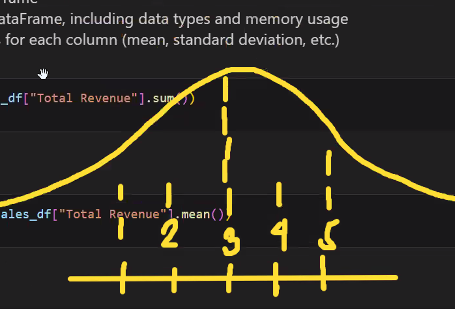

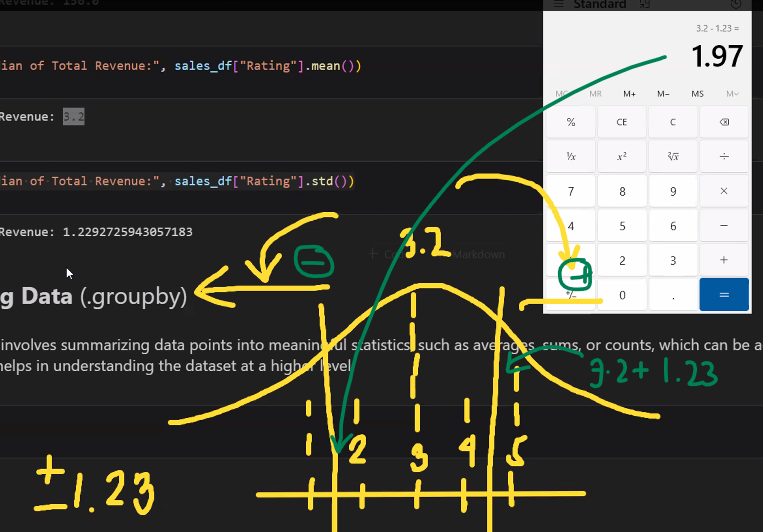

Imagine you get a different number of likes on your fb story each day, and you want to know how much the number of likes on your fb story changes from day to day.

it pretty sums up std in simple terms

if everyday is mostly similar = curve spread is small hence, low std

high std is the opposite

In [158]:
print("Standard Deviation for Rating:", sales_df["Rating"].std())

Standard Deviation for Rating: 1.2292725943057183


In [159]:
print("Variance for Rating:", sales_df["Rating"].var())

Variance for Rating: 1.5111111111111113


Variance = std dev <sup>2</sup> = 1.5

1.23 <sup>2</sup> = 1.5

In [160]:
# First 5 rows by default.
sales_df.head()
sales_df.head(3)

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit,10% Discounted Price
0,Iced Tea,Cold,15,6,7,13,1,78,36,11.7
1,Hot Chocolate,Hot,15,9,10,20,3,180,90,18.0
2,Lemonade,Cold,15,13,6,11,5,143,65,9.9


In [161]:
# Last 5 rows by default.
sales_df.tail()
sales_df.tail(3)

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit,10% Discounted Price
7,Soda,Hot,15,10,11,18,3,180,70,16.2
8,Protein Shake,Cold,15,8,8,20,3,160,96,18.0
9,Matcha Latte,Hot,15,10,9,12,3,120,30,10.8


In [162]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product Name          10 non-null     object 
 1   Type                  10 non-null     object 
 2   Stock                 10 non-null     int64  
 3   Quantity Sold         10 non-null     int64  
 4   Cost of Goods Sold    10 non-null     int64  
 5   Sale Price            10 non-null     int64  
 6   Rating                10 non-null     int64  
 7   Total Revenue         10 non-null     int64  
 8   Gross Profit          10 non-null     int64  
 9   10% Discounted Price  10 non-null     float64
dtypes: float64(1), int64(7), object(2)
memory usage: 932.0+ bytes


In [163]:
sales_df.describe()

,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit,10% Discounted Price
count,10.0,10.000000,10.000000,10.0000,10.000000,10.00000,10.000000,10.00000
mean,15.0,9.500000,8.500000,15.9000,3.200000,150.00000,68.400000,14.31000
std,0.0,2.677063,1.581139,3.3483,1.229273,47.56516,24.829194,3.01347
min,15.0,6.000000,6.000000,11.0000,1.000000,78.00000,30.000000,9.90000
25%,15.0,8.000000,7.250000,13.2500,3.000000,125.75000,47.750000,11.92500
50%,15.0,9.500000,8.500000,16.0000,3.000000,156.00000,73.500000,14.40000
75%,15.0,10.750000,9.750000,18.7500,3.750000,176.25000,87.500000,16.87500
max,15.0,14.000000,11.000000,20.0000,5.000000,238.00000,98.000000,18.00000


### **Aggregating Data** (.groupby)

Aggregating data involves summarizing data points into meaningful statistics, 
such as averages, sums, or counts, which can be achieved using GroupBy operations or pivot tables. 
This helps in understanding the dataset at a higher level.

In [164]:
sales_df

,Product Name,Type,Stock,Quantity Sold,Cost of Goods Sold,Sale Price,Rating,Total Revenue,Gross Profit,10% Discounted Price
0,Iced Tea,Cold,15,6,7,13,1,78,36,11.7
1,Hot Chocolate,Hot,15,9,10,20,3,180,90,18.0
2,Lemonade,Cold,15,13,6,11,5,143,65,9.9
3,Coffee,Hot,15,11,8,15,4,165,77,13.5
4,Milkshake,Cold,15,8,9,19,3,152,80,17.1
5,Tea,Hot,15,6,7,14,2,84,42,12.6
6,Smoothie,Cold,15,14,10,17,5,238,98,15.3
7,Soda,Hot,15,10,11,18,3,180,70,16.2
8,Protein Shake,Cold,15,8,8,20,3,160,96,18.0
9,Matcha Latte,Hot,15,10,9,12,3,120,30,10.8


In [165]:
# Get the unique values
sales_df["Type"].unique()

array(['Cold', 'Hot'], dtype=object)

In [ ]:
# To remove the dtype=object)"
# Change the date type to category
sales_df["Type"] = sales_df["Type"].astype("category")
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Product Name          10 non-null     object  
 1   Type                  10 non-null     category
 2   Stock                 10 non-null     int64   
 3   Quantity Sold         10 non-null     int64   
 4   Cost of Goods Sold    10 non-null     int64   
 5   Sale Price            10 non-null     int64   
 6   Rating                10 non-null     int64   
 7   Total Revenue         10 non-null     int64   
 8   Gross Profit          10 non-null     int64   
 9   10% Discounted Price  10 non-null     float64 
dtypes: category(1), float64(1), int64(7), object(1)
memory usage: 986.0+ bytes


In [170]:
sales_df.groupby("Type")["Total Revenue"].sum()

C:\Users\user\AppData\Local\Temp\ipykernel_21492\2580396556.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_df.groupby("Type")["Total Revenue"].sum()


Type
Cold    771
Hot     729
Name: Total Revenue, dtype: int64

In [171]:
# Create a new DataFrame that contains the total revenue per type of beverage
total_revenue_based_on_type_df = pd.DataFrame()
total_revenue_based_on_type_df["Total Revenue"] = sales_df.groupby("Type")["Total Revenue"].sum()
total_revenue_based_on_type_df

C:\Users\user\AppData\Local\Temp\ipykernel_21492\3853693560.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_revenue_based_on_type_df["Total Revenue"] = sales_df.groupby("Type")["Total Revenue"].sum()


,Total Revenue
Type,
Cold,771
Hot,729
